In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import picograd.autodiff.core as anp
from collections import defaultdict
import networkx as nx
import numpy as np

In [3]:
a = anp.Variable(2.0)
b = anp.Variable(1.0)
interm = a + b

<ufunc 'add'>


In [4]:
a = anp.Variable(anp.array([2.0, 3.0]))
b = anp.Variable(1.0)
interm = anp.exp(a + b)

<built-in function array>
<ufunc 'add'>
<ufunc 'exp'>


In [5]:
print(interm)

Variable([20.08553692 54.59815003], leaf=False, requires_grad=True)


In [6]:
for node in interm.toposort():
    print(node)

Variable([3. 4.], leaf=False, requires_grad=True)
Variable(1.0, leaf=False, requires_grad=True)
Variable([2. 3.], leaf=False, requires_grad=True)


In [7]:
dviz = anp.DAGVisualization(interm)
dviz.create_nx_graph()

['Variable([3. 4.])', 'Variable([20.08553692 54.59815003])', 'Variable([2. 3.])', 'Variable(1.0)']


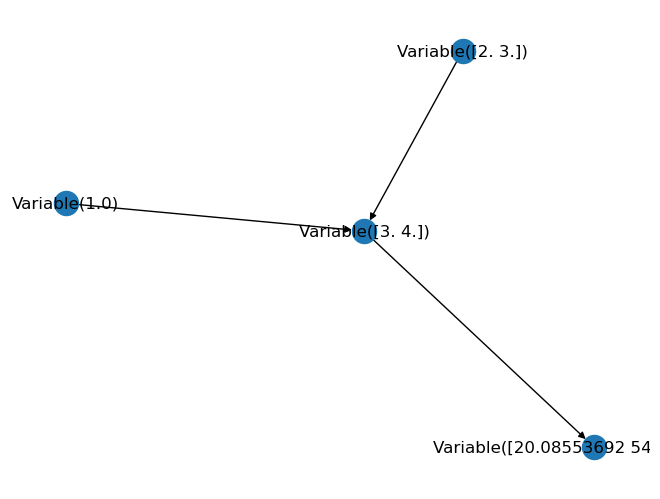

In [8]:
nx.draw(dviz.graph, with_labels=True)

In [2]:
class Node(np.ndarray):

    def __new__(subtype, shape,
                dtype=float,
                buffer=None,
                offset=0,
                strides=None,
                order=None):

        newobj = np.ndarray.__new__(
            subtype, shape, dtype,
            buffer, offset, strides,
            order
        )

        return newobj
